# To find the percentage increase/decrease for the next 5 mins of Bitcoins.

Cryptocurrency had been on the raise in recent years and increments had been obvious in recent months and prices had been very volatile, the purpose of this machines learning is to predict percentage increase/decrease in the next 5mins of bitcoins. The study of this project is solely for academic purpose as prices may be affected by varies other sources example will be news of new partnership or closure of certain core purpose of the crypto. Hence please understand the risk and do your own study when making any investements. 

# The project will be broken into 3 sections.
## Part A: Reading and cleaning the data.
We will select the libarary yfinance which takes the live data from yahoo finance. We will be selecting 18 coins including bitcoins for the study.
## Part B: Analysis of the data.
We will do a analysis on the merge data, finding the correlationship between the tokens.For question 2 we will import yfinance bitcoins.

Sub Questions: 

1) When are the correlationship between the coins.\
2) When is the best time to purchase bitcoins

## Part C: Machine learning with varies models and select the best for tuning.
We will be using regression model for this study as we will be predicting the furture price increment or decrease percentage of bitcoins. We will be using 2 models and 2 ensemble methods namely:

1) Linear Regression\
2) SVR\
3) XGBoost\
4) Random Forest\
And select the model with the best result to do fine tuning.

***Please note that we will be using real life data hence with every reset best fit model may differs***

# PART A: Reading and cleaning the data

In [1]:
# Import the libaries needed

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
import seaborn as sns

### Create Function to clean data and merge data

In [2]:
def clean_data(data_frame,name):
    data_frame['diff'] = ((data_frame.Close - data_frame.Open)/data_frame.Open*100) #create a new row with the price diff percentage
    data_frame = data_frame.reset_index() # reset the dataframe
    data_frame = data_frame[['Datetime','diff']] # trim the dataframe to 2 column
    data_frame = data_frame.rename(columns={"diff": name}) # rename the diff column to name 
    return data_frame

def merge(data_frame,data):
    data_frame = pd.merge(data_frame,data,'outer','Datetime') # merge data to one dataframe naem df
    return data_frame

### Import data from yahoo finance 

In [3]:
df_btc = yf.download('BTC-USD',period="60d", interval="5m") # import duration of 60 days and interval of 5 mins 
df_eth = yf.download('ETH-USD',period="60d", interval="5m")
df_ada = yf.download('ADA-USD',period="60d", interval="5m")
df_bnb = yf.download('BNB-USD',period="60d", interval="5m")
df_xrp = yf.download('XRP-USD',period="60d", interval="5m")
df_ltc = yf.download('LTC-USD',period="60d", interval="5m")
df_link = yf.download('LINK-USD',period="60d", interval="5m")
df_xlm = yf.download('XLM-USD',period="60d", interval="5m")
df_bch = yf.download('BCH-USD',period="60d", interval="5m")
df_doge = yf.download('DOGE-USD',period="60d", interval="5m")
df_xem = yf.download('XEM-USD',period="60d", interval="5m")
df_xmr = yf.download('XMR-USD',period="60d", interval="5m")
df_eos = yf.download('EOS-USD',period="60d", interval="5m")
df_bsv = yf.download('BSV-USD',period="60d", interval="5m")
df_trx = yf.download('TRX-USD',period="60d", interval="5m")
df_miota = yf.download('MIOTA-USD',period="60d", interval="5m")
df_theta = yf.download('THETA-USD',period="60d", interval="5m")
df_vet = yf.download('VET-USD',period="60d", interval="5m")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Use clean_data function created to clean and trim data 

In [4]:
df_btc = clean_data(df_btc,'BTC')
df_eth = clean_data(df_eth,'ETH')
df_ada = clean_data(df_ada,'ADA')
df_bnb = clean_data(df_bnb,'BNB')
df_xrp = clean_data(df_xrp,'XRP')
df_ltc = clean_data(df_ltc,'LTC')
df_link = clean_data(df_link,'LINK')
df_xlm = clean_data(df_xlm,'XLM')
df_bch = clean_data(df_bch,'BCH')
df_doge = clean_data(df_doge,'DOGE')
df_xem = clean_data(df_xem,'XEM')
df_xmr = clean_data(df_xmr,'XMR')
df_eos = clean_data(df_eos,'EOS')
df_bsv = clean_data(df_bsv,'BSV')
df_trx = clean_data(df_trx,'TRX')
df_miota = clean_data(df_miota,'MIOTA')
df_theta = clean_data(df_theta,'THETA')
df_vet = clean_data(df_vet,'VET')

### Create a new column in btc_df to use the price diff percentage of one hour before as a feature for this learning. As the data have 5 min intervals we will shift 20 rows to get the price change percentage an hour before.

In [5]:
df_btc['BTC_an_Hour_Before'] = df_btc.BTC
df_btc['BTC_an_Hour_Before'] = df_btc.BTC.shift(-20)

### Merge all data to df dataframe using merge function created. 

In [6]:
df = merge(df_btc,df_eth)
df = merge(df,df_ada)
df = merge(df,df_bnb)
df = merge(df,df_xrp)
df = merge(df,df_ltc)
df = merge(df,df_link)
df = merge(df,df_xlm)
df = merge(df,df_bch)
df = merge(df,df_doge)
df = merge(df,df_xem)
df = merge(df,df_xmr)
df = merge(df,df_eos)
df = merge(df,df_bsv)
df = merge(df,df_trx)
df = merge(df,df_miota)
df = merge(df,df_theta)
df = merge(df,df_vet)

# PART B: Analysis the data

### Question 1 : What is the correlationships between the coins?
Find the correationship between the tokens and features

In [95]:
corr2 = df.corr()
corr2.style.background_gradient(cmap="coolwarm").set_precision(2)

,BTC,BTC_an_Hour_Before,ETH,ADA,BNB,XRP,LTC,LINK,XLM,BCH,DOGE,XEM,XMR,EOS,BSV,TRX,MIOTA,THETA,VET
BTC,1.00,-0.02,0.80,0.60,0.65,0.54,0.73,0.67,0.57,0.64,0.37,0.46,0.43,0.62,0.42,0.56,0.50,0.45,0.55
BTC_an_Hour_Before,-0.02,1.00,-0.01,-0.02,-0.02,-0.01,-0.01,-0.02,-0.01,-0.03,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,0.00,-0.02,-0.01
ETH,0.80,-0.01,1.00,0.61,0.67,0.57,0.76,0.75,0.58,0.67,0.38,0.46,0.44,0.65,0.43,0.59,0.51,0.46,0.57
ADA,0.60,-0.02,0.61,1.00,0.55,0.48,0.60,0.64,0.54,0.55,0.33,0.39,0.38,0.55,0.35,0.51,0.44,0.41,0.50
BNB,0.65,-0.02,0.67,0.55,1.00,0.49,0.62,0.64,0.53,0.57,0.32,0.43,0.39,0.56,0.36,0.51,0.49,0.45,0.52
XRP,0.54,-0.01,0.57,0.48,0.49,1.00,0.55,0.56,0.72,0.54,0.30,0.41,0.35,0.57,0.36,0.47,0.40,0.37,0.47
LTC,0.73,-0.01,0.76,0.60,0.62,0.55,1.00,0.71,0.56,0.73,0.36,0.42,0.42,0.67,0.48,0.58,0.47,0.42,0.53
LINK,0.67,-0.02,0.75,0.64,0.64,0.56,0.71,1.00,0.59,0.66,0.36,0.44,0.43,0.64,0.42,0.58,0.49,0.47,0.55
XLM,0.57,-0.01,0.58,0.54,0.53,0.72,0.56,0.59,1.00,0.56,0.31,0.42,0.36,0.57,0.39,0.48,0.44,0.42,0.49
BCH,0.64,-0.03,0.67,0.55,0.57,0.54,0.73,0.66,0.56,1.00,0.36,0.42,0.42,0.72,0.58,0.56,0.44,0.40,0.51


### Observation:
From the data we can see that the tokens percentage changes with the highest correlationship with BTC is ETH at 0.8 hence we can see that there is no high corelationship between the tokens as they are below 85% relationship.

## Question 2: When is it best to purchase bitcoins?
For this observation we will extract data from yahoo finance for the 12 months and the maximum year we can obtain and allocate it into the variable df_best. As we are interested in pricing in closing price hence we will drop the other columns.

In [8]:
df_best = yf.download('BTC-USD',period="max", interval="1mo")

[*********************100%***********************]  1 of 1 completed


In [9]:
df_best.head() # observe the dataset
df_best.isnull() # check for null value in dataset
df_best.describe() # description of the dataset

,Open,High,Low,Close,Adj Close,Volume
count,80.000000,80.000000,80.000000,80.000000,80.000000,8.000000e+01
mean,7218.649754,9102.933809,6406.231481,7832.648848,7832.648848,3.569021e+11
std,10922.213782,13707.758410,10110.279685,11874.138181,11874.138181,5.164707e+11
min,216.867004,247.804001,171.509995,217.464005,217.464005,5.531023e+08
25%,510.451248,608.079269,503.574242,564.450485,564.450485,2.220230e+09
50%,4223.206055,5308.542236,3659.404907,4521.050049,4521.050049,1.299798e+11
75%,9208.361572,10567.910645,7476.363770,9268.044678,9268.044678,6.048514e+11
max,58926.562500,64863.097656,53319.187500,58918.832031,58918.832031,2.267153e+12


In [10]:
df_best = df_best.iloc[:,[3]] # locate the 3 column 'Close' column and drop the rest
df_best = df_best.reset_index() #reset the index
df_best = df_best[(df_best['Date'].dt.year > 2014) & (df_best['Date'].dt.year < 2021)] 
# filter the years for 2015 to 2020 as 2014 and 2021 have too many missing value

In [11]:
df_best['year'] = df_best.Date.dt.year #extract the year from date column and create new column
df_best['month'] = df_best.Date.dt.month_name() #extract the month from date column and create new column
df_best = df_best.pivot_table(values='Close',index='month',columns='year')

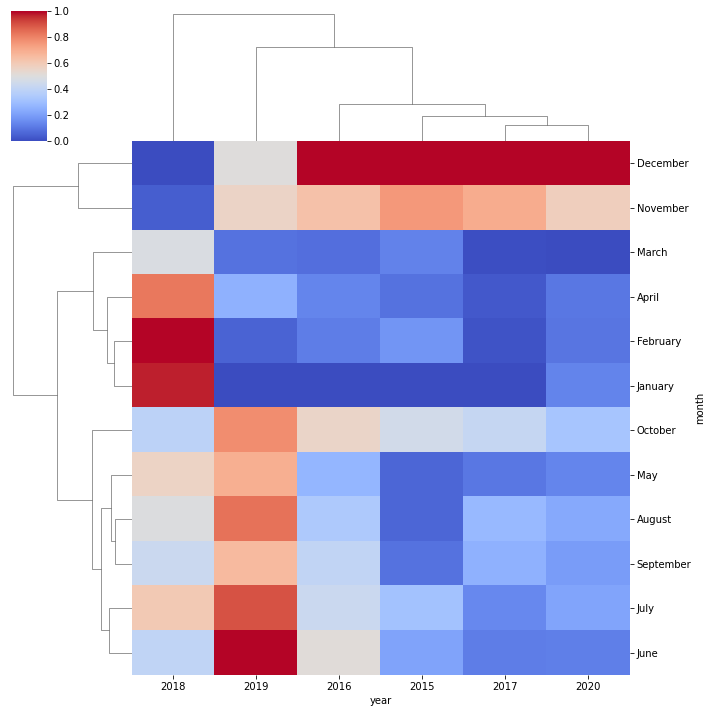

In [12]:
sns.clustermap(df_best, cmap='coolwarm', standard_scale=1) #plot heatmap for the month and year with the value of bitcoins

### Observation:
From the heatmap we can see the the last quarter the prices are higher hence its advisable to sell on last half of the year and make purchase in the first half of the year.

# Part 3 : Machine learning with varies models and select the best for tuning.

In [13]:
df.head() #check the head of the dateaset
df.isnull().sum() #check for null value 
df.describe()

,BTC,BTC_an_Hour_Before,ETH,ADA,BNB,XRP,LTC,LINK,XLM,BCH,DOGE,XEM,XMR,EOS,BSV,TRX,MIOTA,THETA,VET
count,17066.000000,17046.000000,17066.000000,17066.000000,17064.000000,17066.000000,17062.000000,17064.000000,17064.000000,17066.000000,17066.000000,17066.000000,17066.000000,17066.000000,17062.000000,17066.000000,17064.000000,17062.000000,17062.000000
mean,0.001768,0.001691,0.004881,0.002802,0.007439,0.006650,0.004883,0.005210,0.001983,0.005420,0.012569,0.002205,0.007097,0.006505,0.004549,0.008058,0.001497,0.004898,0.011786
std,0.184804,0.184766,0.244989,0.365675,0.366719,0.494366,0.331321,0.340015,0.352825,0.328605,0.677661,0.547969,0.418875,0.364183,0.382609,0.397861,0.463574,0.519068,0.557865
min,-3.630914,-3.630914,-4.869871,-5.810214,-6.089333,-8.918010,-6.537784,-5.455170,-7.532119,-5.916024,-11.549258,-22.470795,-3.581356,-7.368794,-8.464017,-5.806128,-7.827505,-8.816491,-8.009406
25%,-0.086513,-0.086549,-0.102944,-0.138830,-0.166762,-0.160089,-0.137765,-0.142459,-0.126550,-0.124082,-0.166183,-0.193369,-0.183731,-0.151430,-0.135218,-0.164082,-0.184041,-0.231969,-0.223764
50%,-0.000188,-0.000247,0.002966,-0.000614,0.006429,-0.000421,-0.000082,0.003415,-0.000692,0.004118,0.000546,0.002275,0.010076,0.003071,0.003421,0.006683,0.001501,-0.001729,0.005747
75%,0.089894,0.089763,0.111967,0.141408,0.178422,0.168005,0.140137,0.149003,0.133238,0.136014,0.169408,0.199970,0.192565,0.158578,0.141036,0.176114,0.188647,0.234492,0.250853
max,1.662487,1.662487,2.757711,7.006097,3.195816,5.226263,5.087648,4.383410,3.425496,4.487224,10.919756,9.706063,3.395138,3.713262,5.072529,4.743171,5.777684,5.792334,7.870340


In [14]:
df = df.dropna() #drop missing value 

In [15]:
df.drop('Datetime',axis='columns', inplace=True) # drop date and time 

In [16]:
df.info() #check for null value and data info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17029 entries, 0 to 17045
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BTC                 17029 non-null  float64
 1   BTC_an_Hour_Before  17029 non-null  float64
 2   ETH                 17029 non-null  float64
 3   ADA                 17029 non-null  float64
 4   BNB                 17029 non-null  float64
 5   XRP                 17029 non-null  float64
 6   LTC                 17029 non-null  float64
 7   LINK                17029 non-null  float64
 8   XLM                 17029 non-null  float64
 9   BCH                 17029 non-null  float64
 10  DOGE                17029 non-null  float64
 11  XEM                 17029 non-null  float64
 12  XMR                 17029 non-null  float64
 13  EOS                 17029 non-null  float64
 14  BSV                 17029 non-null  float64
 15  TRX                 17029 non-null  float64
 16  MIOT

In [17]:
X = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]] # allocate all the features to the X column
y = df.iloc[:, 0] # allocate the BTC column as the label in y

# 1st Model :  Linear Regression

In [18]:
# split for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [19]:
sc = StandardScaler() #scale the data
X_train = sc.fit_transform(X_train) #fit into the train dataset
X_test = sc.transform(X_test)

In [20]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train) # fit the train data in the regressor 

LinearRegression()

In [21]:
print(regressor.intercept_) 
print(regressor.coef_)

0.0001817672180284855
[-0.00069848  0.08266108  0.01289339  0.01755044  0.0005734   0.02793503
 -0.0040037   0.00617147  0.00449129  0.00417445  0.0063352   0.00554204
  0.00439391  0.00268211  0.00383833  0.00535209  0.00442704  0.00735346]


In [22]:
y_pred = regressor.predict(X_test) # do the prediction

In [23]:
lr_mbe = metrics.mean_absolute_error(y_test, y_pred)
lr_mse = metrics.mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
df_lr = pd.DataFrame({'Actual': y_test, 'LR_Predicted': y_pred})
df_lrr = pd.Series( {'Mean Absolute Error': lr_mbe, 'Mean Squared Error': lr_mse,'Root Mean Squared Error':lr_rmse})
df_lrr = df_lrr.reset_index()
df_lrr = df_lrr.rename(columns = {0:'LR', 'index':'Eval'}, inplace = False)

Text(0.5, 0, 'True (ground truth)')

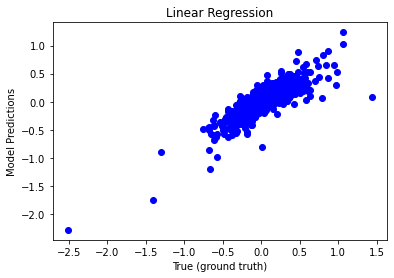

In [24]:
# plot the data with prediction and truth and observe 
plt.scatter(y_test, y_pred, color = 'b')
plt.title('Linear Regression')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

# 2nd Model : SVR

In [25]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [26]:
sc = StandardScaler() #scale the data
X_train = sc.fit_transform(X_train) #fit into the train dataset
X_test = sc.transform(X_test)

In [27]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)
y_pred = regressor.predict(X_test) # predict 

In [28]:
svr_mbe = metrics.mean_absolute_error(y_test, y_pred)
svr_mse = metrics.mean_squared_error(y_test, y_pred)
svr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
df_svr = pd.DataFrame({'Actual': y_test, 'SVR_Predicted': y_pred})
df_svrr = pd.Series( {'Mean Absolute Error': svr_mbe, 'Mean Squared Error': svr_mse,'Root Mean Squared Error':svr_rmse})
df_svrr = df_svrr.reset_index()
df_svrr = df_svrr.rename(columns = {0:'SVR', 'index':'Eval'}, inplace = False)

Text(0.5, 0, 'True (ground truth)')

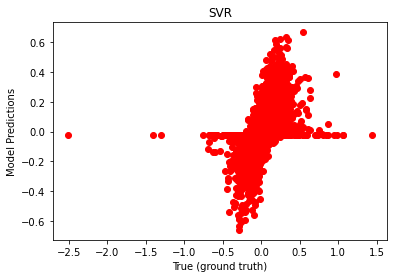

In [29]:
# plot the label and prediction
plt.scatter(y_test, y_pred, color = 'r')
plt.title('SVR')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

# 3rd Model : XG Boost

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [31]:
regressor = xgb.XGBRegressor()

In [32]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [33]:
xgb_mbe = metrics.mean_absolute_error(y_test, y_pred)
xgb_mse = metrics.mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
df_xgb = pd.DataFrame({'Actual': y_test, 'XGB_Predicted': y_pred})
df_xgbr = pd.Series( {'Mean Absolute Error': xgb_mbe, 'Mean Squared Error': xgb_mse,'Root Mean Squared Error':xgb_rmse})
df_xgbr = df_xgbr.reset_index()
df_xgbr = df_xgbr.rename(columns = {0:'XGB', 'index':'Eval'}, inplace = False)

Text(0.5, 0, 'True (ground truth)')

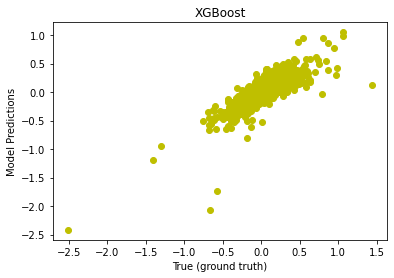

In [34]:
plt.scatter(y_test, y_pred, color = 'y')
plt.title('XGBoost')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

# 4th Model : Random Forest

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [36]:
regressor = RandomForestRegressor(n_estimators=20, random_state=11)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [37]:
rf_mbe = metrics.mean_absolute_error(y_test, y_pred)
rf_mse = metrics.mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
df_rf = pd.DataFrame({'Actual': y_test, 'RF_Predicted': y_pred})
df_rfr = pd.Series( {'Mean Absolute Error': rf_mbe, 'Mean Squared Error': rf_mse,'Root Mean Squared Error':rf_rmse})
df_rfr = df_rfr.reset_index()
df_rfr = df_rfr.rename(columns = {0:'RF', 'index':'Eval'}, inplace = False)

Text(0.5, 0, 'True (ground truth)')

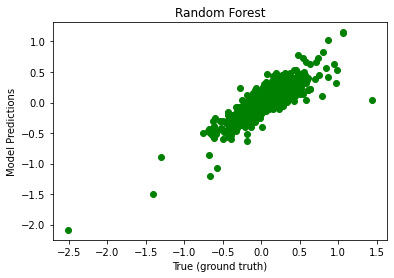

In [38]:
plt.scatter(y_test, y_pred, color = 'g')
plt.title('Random Forest')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

### Result
Below i will merge the result from the 4 models and compare them\
LR = Linear Regression\
SVR = Support Vector Regression\
xgb = XGBoost\
rf = Random Forest

In [39]:
df_result = pd.merge(df_lr,df_svr,'inner','Actual')
df_result = pd.merge(df_result,df_xgb,'inner','Actual')
df_result = pd.merge(df_result,df_rf,'inner','Actual')

In [40]:
df_eval = pd.merge(df_lrr,df_svrr,'inner','Eval')
df_eval = pd.merge(df_eval,df_xgbr,'inner','Eval')
df_eval = pd.merge(df_eval,df_rfr,'inner','Eval')

In [41]:
display(df_result.head())
display(df_eval.head())

,Actual,LR_Predicted,SVR_Predicted,XGB_Predicted,RF_Predicted
0,0.089976,0.285621,-0.022728,0.356758,0.308151
1,0.083295,0.015076,0.022790,0.004299,0.022476
2,0.069510,0.101981,0.401785,0.141954,0.129379
3,-0.065514,-0.021737,-0.043639,-0.053693,-0.028670
4,0.222819,0.164304,0.366411,0.152097,0.209945


,Eval,LR,SVR,XGB,RF
0,Mean Absolute Error,0.066438,0.107681,0.066363,0.065375
1,Mean Squared Error,0.009260,0.026482,0.009910,0.008901
2,Root Mean Squared Error,0.096228,0.162732,0.099547,0.094343


### Observation:
From the table we can see that Random forest gives the best prediction as compared to the other models with the lowest for the 3 errors.

### Hyper Parimeter Tuning:
We will use Random Forest for fine tuning to get the best result.

In [42]:
index = [] # create a empty list for index
result = [] # create a empty list for result
for test_size in np.arange(0.15, 0.85, 0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 11) # do train test split
    # input regressor with fix n_estiator and random state to have saame data set to do comparison
    regressor = RandomForestRegressor(n_estimators = 20, random_state = 11) 
    regressor.fit(X_train, y_train) # fit to model
    y_pred = regressor.predict(X_test) # predict 
    results = (metrics.mean_absolute_error(y_test, y_pred)) # use mean absolute error for comparison 
    index.append(test_size)
    result.append(results)

In [43]:
df_test = pd.DataFrame({'Test Size': index, 'Result': result}) #insert into dataframe

<AxesSubplot:xlabel='Test Size'>

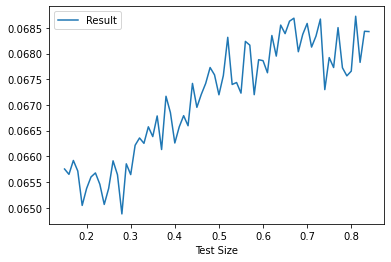

In [44]:
df_test.plot(x = 'Test Size') # plot the graph for visualation 

In [45]:
df_test.sort_values(by="Result",ascending=True).head()

,Test Size,Result
13,0.28,0.064880
4,0.19,0.065046
9,0.24,0.065065
5,0.20,0.065375
10,0.25,0.065376


In [58]:
num = df_test.sort_values(by="Result",ascending=True).head()
num = num.reset_index()
num = num['Test Size'][0]
print('Best Test Size :', num)

Best Test Size : 0.28000000000000014


### Observation:
After testing the test size in range of 15% to 85% to prevent from overfitting or underfitting with fix random state of 11, we will use the best test size for the testing below to find best number of trees.

In [53]:
num_of_estimator = [10,50,100,150,200,250]

In [64]:
index = [] # create a empty list for index
result = [] # create a empty list for result
for tree in num_of_estimator:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = num, random_state = 11)
    regressor = RandomForestRegressor(n_estimators=tree, random_state=11) #use range for n_estimator 
    regressor.fit(X_train, y_train) # fit regressor
    y_pred = regressor.predict(X_test)
    results = (metrics.mean_absolute_error(y_test, y_pred)) # use mean absolute error for comparison
    index.append(tree)
    result.append(results)

In [65]:
df_result_rf = pd.DataFrame({'Num_of_Trees': index, 'Result': result}) # create dataframe 

<AxesSubplot:xlabel='Num_of_Trees'>

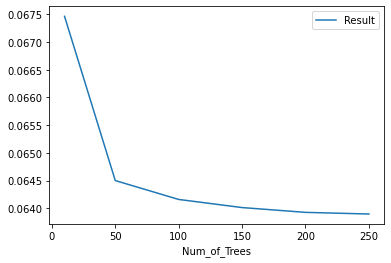

In [66]:
df_result_rf.plot(x = 'Num_of_Trees') # plot the graph for visualation 

In [67]:
df_result_rf.sort_values(by="Result",ascending=True).head()

,Num_of_Trees,Result
5,250,0.063895
4,200,0.063925
3,150,0.064011
2,100,0.064158
1,50,0.064499


### Observation:
After testing the higher the n_estimator the better the performance however we can see that there is little improvements after 150 trees hence to have a better performance and faster model the ideal n_estimator should be set at 150.  

### Please note for every reset percentage may change as the we are using real life data and market fluctration may cause the model percentage to change for better result with different amount of n_estimator.

# Final Model

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = num, random_state = 11)
regressor = RandomForestRegressor(n_estimators=150, random_state=11) #use range for n_estimator 
regressor.fit(X_train, y_train) # fit regressor
y_pred = regressor.predict(X_test)

In [60]:
mbe = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
best_predict = pd.DataFrame({'Actual': y_test, 'Best_Predicted': y_pred})
best_df = pd.Series( {'Mean Absolute Error': mbe, 'Mean Squared Error': mse,'Root Mean Squared Error':rmse})

In [61]:
display(best_predict.head())

,Actual,Best_Predicted
4219,0.089976,0.295685
9121,0.083295,0.021361
1164,0.069510,0.118806
10069,-0.065514,-0.053327
16851,0.222819,0.179692


In [62]:
best_df

Mean Absolute Error        0.064011
Mean Squared Error         0.008624
Root Mean Squared Error    0.092866
dtype: float64

Text(0.5, 0, 'True (ground truth)')

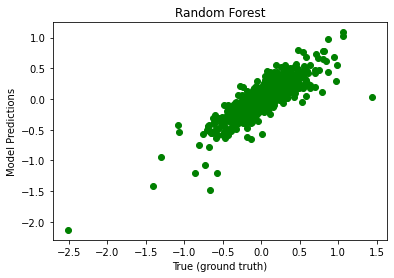

In [63]:
plt.scatter(y_test, y_pred, color = 'g')
plt.title('Random Forest')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

# ***End***